In [1]:
# Import dependencies
import os
import re
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import sem, linregress
from matplotlib import pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import nltk
from nltk.tokenize import word_tokenize

In [2]:
# List of playlist names
playlists = [ "todays_top_hits","rap_caviar", "mint", "rock_this", "are_and_be",
             "viva_latino", "hot_country", "new_music_friday_malaysia",
             "viral_hits", "fresh_finds", "global_top_50", "united_states_top_50",
             "global_viral_50", "united_states_viral_50"]

# Initialize empty data frame
freq_df = pd.DataFrame()

# Iterate through playlists
for playlist in playlists:
    # Read in playlist .csv file
    print(f"Playlist: {playlist}")
    print("------------------------")
    
     # This line may need to be changed
    pl_csv_path = f"../../Data_Files/Play_Lists/{playlist}.csv"  
    
    
    pl_csv = pd.read_csv(pl_csv_path)
    pl_csv = pl_csv.drop("Unnamed: 0", axis = 1)

    for index, row in pl_csv.iterrows():
        # Get path to lyrics file
        lyrics_path = pl_csv.loc[index, 'Lyrics Path']
        
        # This line may need to be changed
        #lyrics_path = lyrics_path[3:]  # This can be removed when Genius API script is updated

        # Open lyrics file, convert to list
        lyrics = pd.read_table(lyrics_path, names = ["Lyrics"])
        lyrics = lyrics["Lyrics"].values.tolist()

        # New list with entries starting with '[' removed
        lyrics = [lyric for lyric in lyrics if not lyric.startswith('[')]

        # Create a lyric frame with sentiment score for each line in each song
        #print(f"Sentiment score for {pl_csv.loc[index, 'Track Name']} by {pl_csv.loc[index, 'Artist Name']}")
        
        lyrics_list = []
        # For each line of each song
        for lyric in lyrics:
            lyric = re.sub(r"[^a-zA-Z0-9_]+", " ", lyric)
            lyric = word_tokenize(lyric)
            lyrics_list.extend(lyric)
            cnt = Counter()
            for word in lyrics_list:
                cnt[word] += 1

Playlist: todays_top_hits
------------------------
Playlist: rap_caviar
------------------------
Playlist: mint
------------------------
Playlist: rock_this
------------------------
Playlist: are_and_be
------------------------
Playlist: viva_latino
------------------------
Playlist: hot_country
------------------------
Playlist: new_music_friday_malaysia
------------------------
Playlist: viral_hits
------------------------
Playlist: fresh_finds
------------------------
Playlist: global_top_50
------------------------
Playlist: united_states_top_50
------------------------
Playlist: global_viral_50
------------------------
Playlist: united_states_viral_50
------------------------


In [3]:
# Tally occurrences of words in a list
lyric_dict = {}
for k,v in cnt.items():
    print(k,v)
    lyric_dict[k] = [v]
    


D 1
A 2
Slide 1
on 7
a 32
pimp 1
game 1
with 5
my 7
pinky 1
ring 1
Lotta 2
gang 1
lotta 2
bitches 4
and 4
icy 1
chain 1
Why 1
you 18
claim 3
that 7
rich 2
That 1
s 11
false 1
I 14
be 3
straight 1
to 3
the 33
whip 1
no 3
baggage 1
Whole 1
styles 1
can 16
t 7
even 1
pronounce 1
name 2
You 1
ain 4
got 5
style 1
see 1
Instagram 1
rockin 1
it 15
like 16
fresh 1
out 3
pan 1
Only 1
when 1
m 5
takin 1
pics 1
middleman 1
Walk 1
talk 2
boss 1
just 1
lift 1
hand 1
3 1
million 1
cash 1
call 1
me 14
rain 2
man 1
Money 1
shower 1
dance 1
And 6
we 2
all 3
in 6
black 2
Gangland 1
Say 1
wrong 1
word 1
hangman 1
Watch 1
stick 1
your 1
bitch 3
spray 1
tan 1
Aw 2
Mr 1
What 1
Kind 1
Of 1
Car 1
He 1
In 2
city 1
love 6
nigga 4
ta 1
say 4
Taste 27
taste 52
she 12
get 22
fuck 2
what 2
It 2
same 2
Mary 2
Kate 2
let 4
do 5
Yeah 6
cool 3
but 2
he 2
girls 1
niggas 3
wan 2
na 2
fight 1
Nigga 1
yo 1
ass 1
checked 1
fuckin 2
Nike 1
Me 1
not 2
icey 1
unlikely 1
gon 3
suck 3
Hi 1
C 1
chains 1
neck 1
for 1
whole 2
team 

In [4]:
cnt

Counter({'D': 1,
         'A': 2,
         'Slide': 1,
         'on': 7,
         'a': 32,
         'pimp': 1,
         'game': 1,
         'with': 5,
         'my': 7,
         'pinky': 1,
         'ring': 1,
         'Lotta': 2,
         'gang': 1,
         'lotta': 2,
         'bitches': 4,
         'and': 4,
         'icy': 1,
         'chain': 1,
         'Why': 1,
         'you': 18,
         'claim': 3,
         'that': 7,
         'rich': 2,
         'That': 1,
         's': 11,
         'false': 1,
         'I': 14,
         'be': 3,
         'straight': 1,
         'to': 3,
         'the': 33,
         'whip': 1,
         'no': 3,
         'baggage': 1,
         'Whole': 1,
         'styles': 1,
         'can': 16,
         't': 7,
         'even': 1,
         'pronounce': 1,
         'name': 2,
         'You': 1,
         'ain': 4,
         'got': 5,
         'style': 1,
         'see': 1,
         'Instagram': 1,
         'rockin': 1,
         'it': 15,
         'like': 16,

In [5]:
# List of playlist names
playlists = ["rap_caviar"]

# Initialize empty data frame
freq_df = pd.DataFrame()

# Iterate through playlists
for playlist in playlists:
    # Read in playlist .csv file
    print(f"Playlist: {playlist}")
    print("------------------------")
    pl_csv_path = f"../../Data_Files/Play_Lists/{playlist}.csv"
    pl_csv = pd.read_csv(pl_csv_path)
    pl_csv = pl_csv.drop("Unnamed: 0", axis = 1)

    lyrics_list = []
    for index, row in pl_csv.iterrows():
        # Get path to lyrics file
        lyrics_path = pl_csv.loc[index, 'Lyrics Path']
        #lyrics_path = lyrics_path[3:]  # This can be removed when Genius API script is updated

        # Open lyrics file, convert to list
        lyrics = pd.read_table(lyrics_path, names = ["Lyrics"])
        lyrics = lyrics["Lyrics"].values.tolist()

        # New list with entries starting with '[' removed
        lyrics = [lyric for lyric in lyrics if not lyric.startswith('[')]

        # Create a lyric frame with sentiment score for each line in each song
        #print(f"Sentiment score for {pl_csv.loc[index, 'Track Name']} by {pl_csv.loc[index, 'Artist Name']}")
        
        # For each line of each song
        for lyric in lyrics:
            lyric = re.sub(r"[^a-zA-Z0-9_]+", " ", lyric)
            lyric = word_tokenize(lyric)
            lyrics_list.extend(lyric)
            
    cnt = Counter()
    for word in lyrics_list:
        cnt[word] += 1
    word_count = pd.DataFrame.from_dict(cnt, orient = 'index').reset_index()
    word_count = word_count.rename(columns = {'index': 'Word',
                                             0: 'Frequency'})
    word_count["Playlist"] = playlist
    freq_df = freq_df.append(word_count)
    
        


Playlist: rap_caviar
------------------------


In [6]:
freq_df.head()

,Word,Frequency,Playlist
0,Whoa,1,rap_caviar
1,Joyner,3,rap_caviar
2,yeah,237,rap_caviar
3,Yeah,67,rap_caviar
4,I,1719,rap_caviar


In [7]:
freq_df["Word"].head()

0      Whoa
1    Joyner
2      yeah
3      Yeah
4         I
Name: Word, dtype: object

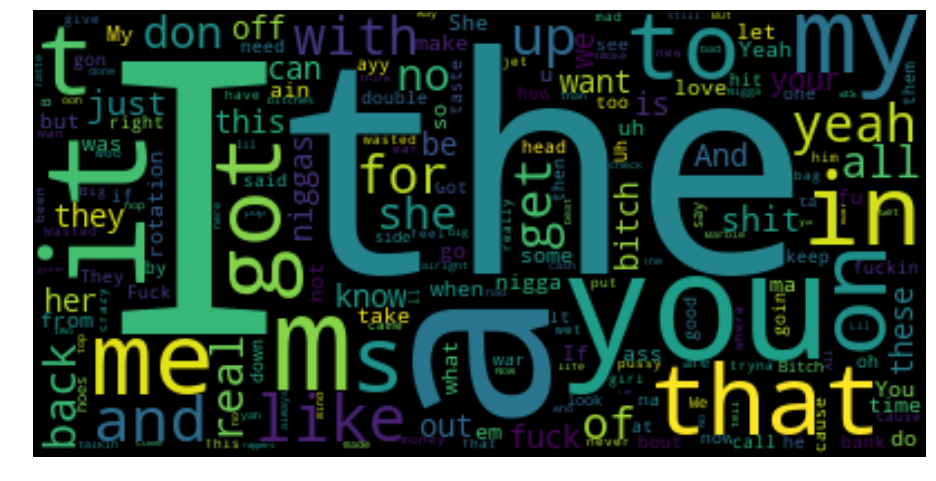

<Figure size 432x288 with 0 Axes>

In [10]:
d = {}

for index, row in freq_df.iterrows():
    d[row["Word"]] = row["Frequency"]

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig("word.jpg", dpi=None)

In [ ]:
# Import dependencies
import requests
import numpy as np
import pandas as pd
from rapidconnect import RapidConnect
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import os

#rapid = RapidConnect('ProjectName', 'ProjectKey')
rapid = RapidConnect('music-analysis_5b91cd1ee4b02d6cfa6a0c0a', '82a7033c-3bbf-4e42-9d90-28cc8e69df31')

In [ ]:
uniqueVals = freq_df["Word"].unique()

uniqueVals

In [ ]:
perMillion = []
zipf = []

for word in uniqueVals:
    #target_url = "https://wordsapiv1.p.mashape.com/words/" + word + "/frequency"
    
    # tv maze show search base url
    response = requests.get(target_url,
        headers={
            "X-Mashape-Key": "xYMF30AO4vmshnPR109vUSTTfZXgp1zfpzYjsn1jVIuxeOK305",
            "X-Mashape-Host": "wordsapiv1.p.mashape.com"
        }
    ).json()
    print(f"adding {word}...")
    if ("frequency" in response):
        perMillion.append(response['frequency']['perMillion'])
        zipf.append(response['frequency']['zipf'])
    
#     zipf.append(response['frequency']['zipf'])
#set up lists to hold response data for name and rating
#words = []
#perMillion = []
#zipf = []

# # loop through tv show titles, make requests and parse
# for word in show:
#     target_url = base_url
#     response =target_url.json()
#     words.append(response['word'])
#     perMillion.append(response['frequency']['perMillion'])
#     zipf.append(response['frequency']['zipf'])
    
print (perMillion)
print (zipf)

In [ ]:
# https://wordsapiv1.p.mashape.com/words/warm/frequency

freq_df["perMillion"] = ""
freq_df["zipf"] = ""

In [11]:
freq_df.head()

,Word,Frequency,Playlist
0,Whoa,1,rap_caviar
1,Joyner,3,rap_caviar
2,yeah,237,rap_caviar
3,Yeah,67,rap_caviar
4,I,1719,rap_caviar
